In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('housing.csv')

In [ ]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
pd.DataFrame(X, columns=dataset.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
X = dataset.drop(['median_house_value'], axis = 1)
y = dataset['median_house_value']

In [ ]:
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_

In [ ]:
print(y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64


In [ ]:
# prompt: perform OneHotEncoding on the 'ocean_proximity' column in X, and also import the required class and functions

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('encoder', OneHotEncoder(), ['ocean_proximity'])], remainder='passthrough')
X_transformed_df = ct.fit_transform(X)

In [ ]:
X_transformed_df[0]

array([   0.    ,    0.    ,    0.    ,    1.    ,    0.    , -122.23  ,
         37.88  ,   41.    ,  880.    ,  129.    ,  322.    ,  126.    ,
          8.3252])

In [ ]:
columns = ct.get_feature_names_out(X.columns)
X_transformed_df = pd.DataFrame(X_transformed, columns=columns)

In [ ]:
X_transformed_df.head()

,encoder__ocean_proximity_<1H OCEAN,encoder__ocean_proximity_INLAND,encoder__ocean_proximity_ISLAND,encoder__ocean_proximity_NEAR BAY,encoder__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__total_rooms,remainder__total_bedrooms,remainder__population,remainder__households,remainder__median_income
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [ ]:
pd.get_dummies(X['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
new_X = pd.concat([X.drop('ocean_proximity', axis=1), pd.get_dummies(X['ocean_proximity'])], axis=1)

In [ ]:
new_X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2)

In [ ]:
print(X_train)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15750    -122.45     37.77                52.0       3188.0           708.0   
17968    -121.99     37.31                26.0       3285.0           502.0   
4317     -118.34     34.08                50.0       3457.0           854.0   
16640    -120.66     35.29                23.0       1932.0           487.0   
15124    -116.88     32.86                 9.0       3049.0           471.0   
...          ...       ...                 ...          ...             ...   
4302     -118.29     34.09                52.0       1272.0           322.0   
12797    -121.45     38.62                37.0       1534.0           315.0   
1656     -121.93     37.89                13.0       2085.0           292.0   
13169    -121.44     36.84                 7.0       1644.0           338.0   
20360    -118.94     34.17                16.0       3746.0           508.0   

       population  households  median_income  <1H O

In [ ]:
print(y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64


In [ ]:
train_data = X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,0,0,0,1,0,500001.0
17968,-121.99,37.31,26.0,3285.0,502.0,1443.0,530.0,5.7833,1,0,0,0,0,339600.0
4317,-118.34,34.08,50.0,3457.0,854.0,1584.0,841.0,3.1078,1,0,0,0,0,346700.0
16640,-120.66,35.29,23.0,1932.0,487.0,1380.0,472.0,1.9647,0,0,0,0,1,253600.0
15124,-116.88,32.86,9.0,3049.0,471.0,1527.0,515.0,5.0733,1,0,0,0,0,196600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4302,-118.29,34.09,52.0,1272.0,322.0,984.0,353.0,1.9063,1,0,0,0,0,261600.0
12797,-121.45,38.62,37.0,1534.0,315.0,1147.0,322.0,2.5643,0,1,0,0,0,59800.0
1656,-121.93,37.89,13.0,2085.0,292.0,852.0,264.0,7.3445,0,1,0,0,0,366700.0
13169,-121.44,36.84,7.0,1644.0,338.0,1143.0,331.0,4.0050,0,1,0,0,0,180400.0


In [ ]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
longitude,1.000000,-0.924834,-0.112271,0.042324,0.067293,0.094794,0.053963,-0.018740,0.321005,-0.048026,0.008139,-0.477202,0.041212,-0.048715
latitude,-0.924834,1.000000,0.017257,-0.034048,-0.064860,-0.103881,-0.069123,-0.077063,-0.448417,0.343709,-0.014405,0.361468,-0.154955,-0.141264
housing_median_age,-0.112271,0.017257,1.000000,-0.359231,-0.318859,-0.291686,-0.301508,-0.116501,0.041431,-0.234452,0.007921,0.260699,0.018438,0.109354
total_rooms,0.042324,-0.034048,-0.359231,1.000000,0.927827,0.851698,0.917626,0.200619,-0.004384,0.026837,-0.007058,-0.024780,-0.007210,0.137378
total_bedrooms,0.067293,-0.064860,-0.318859,0.927827,1.000000,0.872474,0.979844,-0.009298,0.018130,-0.005758,-0.003946,-0.021410,0.001504,0.051049
population,0.094794,-0.103881,-0.291686,0.851698,0.872474,1.000000,0.902793,0.004364,0.072406,-0.019090,-0.009454,-0.063012,-0.021118,-0.024015
households,0.053963,-0.069123,-0.301508,0.917626,0.979844,0.902793,1.000000,0.012688,0.042219,-0.037544,-0.008376,-0.013235,0.002470,0.065996
median_income,-0.018740,-0.077063,-0.116501,0.200619,-0.009298,0.004364,0.012688,1.000000,0.166406,-0.236581,-0.008261,0.056680,0.029390,0.690125
<1H OCEAN,0.321005,-0.448417,0.041431,-0.004384,0.018130,0.072406,0.042219,0.166406,1.000000,-0.608727,-0.012064,-0.317235,-0.338793,0.255656
INLAND,-0.048026,0.343709,-0.234452,0.026837,-0.005758,-0.019090,-0.037544,-0.236581,-0.608727,1.000000,-0.009262,-0.243544,-0.260094,-0.483040


<Axes: >

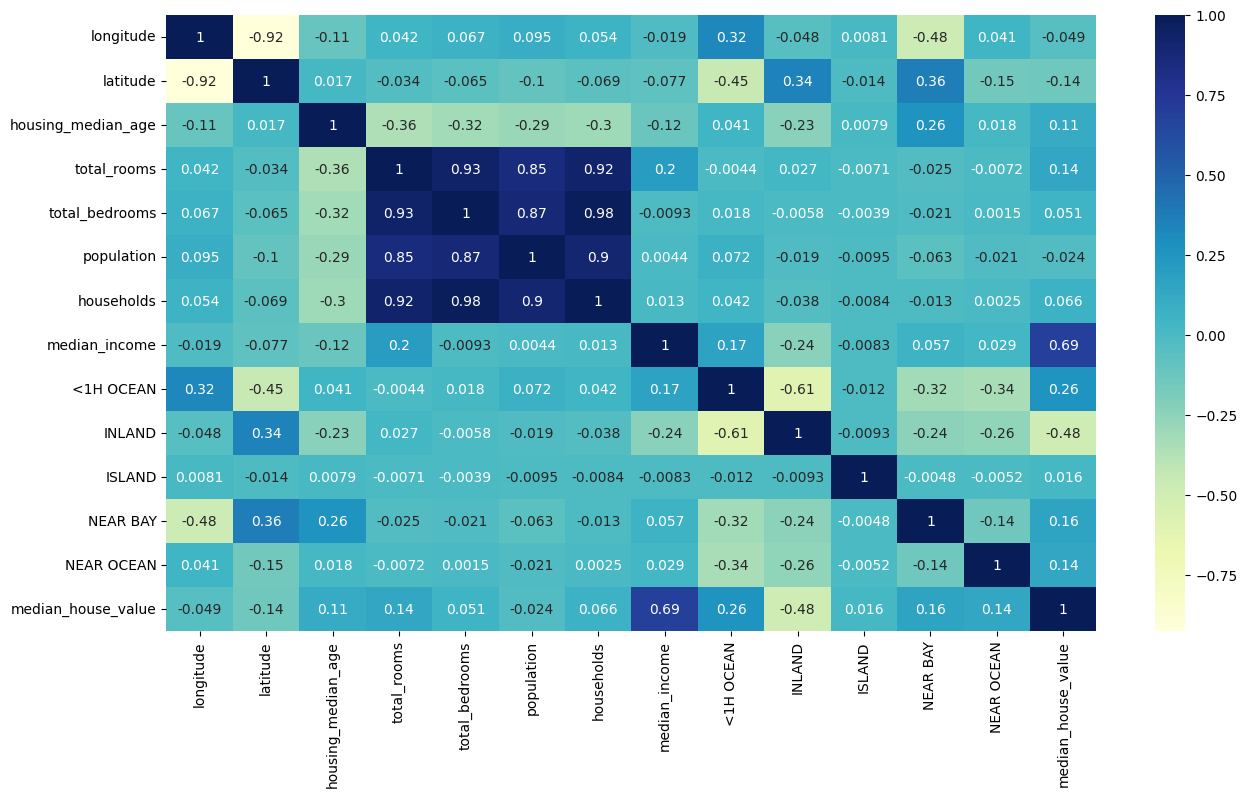

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap = 'YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

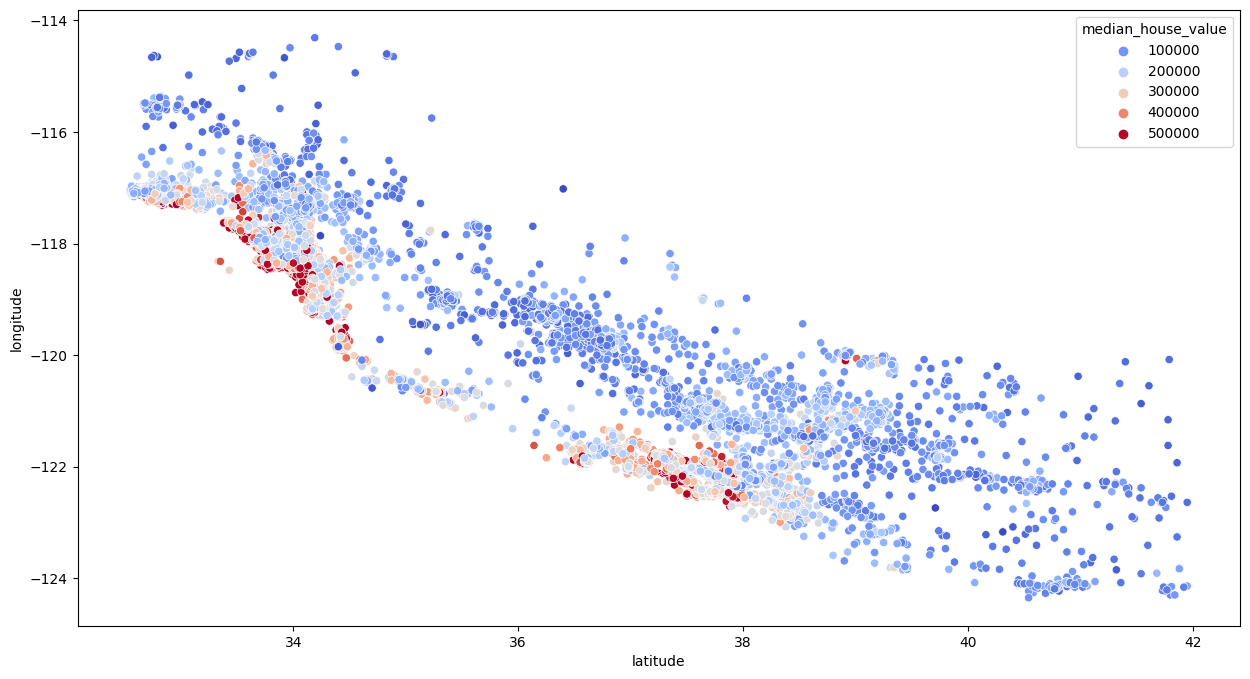

In [ ]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x='latitude', y='longitude', data = train_data, hue = 'median_house_value', palette='coolwarm')

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.score(X_test, y_test)

0.6407233415605375

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

In [ ]:
regressor_rf.score(X_test, y_test)

0.8139439096838132

In [ ]:
regressor_rf.predict(X_test)

array([259650., 236630.,  99710., ...,  74020., 256980., 227010.])

In [ ]:
prediction_data = pd.DataFrame({
    'longitude' : [-122],
    'latitude' : [37],
    'housing_median_age' : [36],
    'total_rooms' : [912],
    'total_bedrooms' : [1024],
    'population' : [612],
    'households' : [123],
    'median_income' : [10.25252],
    '<1H OCEAN' : [1],
    'INLAND' : [0],
    'ISLAND' : [0],
    'NEAR BAY' : [0],
    'NEAR OCEAN' : [0],
})

In [ ]:
predictions_another = regressor_rf.predict(prediction_data)

In [ ]:
predictions_another

array([500001.])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
regressor_dt.score(X_test, y_test)

0.6372246133581663